# PreFRBLE + Magnetizer

## Initial exploration/checking

Checks on the first 5 small volumes before resubmission of the large runs

### Basic imports and setup

In [1]:
%matplotlib inline
import sys, os, os.path
import numpy as np
sys.path.append('/home/lrodrigues/Magnetizer/python/')
import matplotlib.pyplot as plt
import seaborn as sns
import magnetizer.prepare_pandas
import astropy.units as u
import astropy.constants as c
import magnetizer
import magnetizer.visualization as visu

In [2]:
1

1

In [3]:
import matplotlib as mpl
mnras_column_size = 3.32153
mnras_text_size = 6.97522
mpl.rcParams['figure.figsize'] = [mnras_text_size, mnras_text_size/2.]
mpl.rcParams['figure.dpi'] = 200
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble']=[r'\usepackage{amsmath,newtxmath}']

In [11]:
nvols = 6

input_files = ['/home/lrodrigues/storage/magnetizer_inputs/Lacey14_{}_corr.hdf5'.format(i) 
               for i in range(1,nvols+1) if i!= 3] #ivol=3 file got currupted and will be ignored
output_files = ['/home/lrodrigues/storage/magnetizer_outputs/Lacey14_{}_corr.hdf5'.format(i) 
                for i in range(1,nvols+1) if i!=3]

run = magnetizer.MagnetizerRun(output_path=output_files, 
                               input_path=input_files, verbose=True)

In [12]:
run.show_outputs()

Quantity    Units        Description
---------   ----------   -----------------------------------
Bavg        microgauss   Surface average magnetic field
Beavg       microgauss   "Energy averaged" magnetic field
Bmax        microgauss   Maximum B
Bmax_idx                 Index of maximum |B|
Bp          microgauss   
Br          microgauss   
Bzmod       microgauss   
DM          pc cm^-3     Dispersion measure along a random LoS
FRB_DM      pc cm^-3     Dispersion measure along a random LoS
FRB_LoS_counts             Number of sighlines used
FRB_LoS_thetaradians      Inclination (for observables calculation)
FRB_LoS_y                Impact parameter used in the RM calculation in units of rmax
FRB_LoS_z                Impact parameter used in the RM calculation in units of rmax
FRB_RM      rad/m^2      Rotation measure along a random LoS
FRB_SM      kpc m^-{20/3}Scattering measure along a random LoS
FRB_column_denscm^-2        Column density of warm neutral gas
FRB_column_densitycm^-2 

In [13]:
print('Number of galaxies:',run.ngals)

Number of galaxies: 183434


## Examining distributions at z=0

In [14]:
# Removes any NaNs
valid = lambda x : x[np.isfinite(x)]

def plot_distribution(x, name='', unit=None, log=False,
                     **kwargs):
    """
    Plots distribution using 
    """
    x = u.Quantity(x)
    if unit is not None:
        x = x.to(unit)
    str_unit = x.unit._repr_latex_().replace('$','')

    if not log:
        sns.distplot(valid(x.value),**kwargs)
        label = r'$ {} ' .format(name)
        if str_unit in ('', '\\mathrm{}'):
            label += '$'
        else:
            label += r'\;[ {} ]$'.format(str_unit)
                                
    else:
        sns.distplot(valid(np.log(x.value)),**kwargs)
        label = r'$\log\left( {} '.format(name)
        if str_unit in ('', '\\mathrm{}'):
            label += '\right)$'
        else:
            label += r'\, /\, {} \right)$'.format(str_unit)
    if 'ax' in kwargs:
        kwargs['ax'].set_xlabel(label)
    else:
        plt.xlabel(label)

### Line of sight parameters

I was not explicitly drawing $\theta$ from a distribtuion. Instead, $\theta$ was sample from a uniform distribution, as were two impact parameters in the plane of the sky, $(y_{\rm sky}, z_{\rm sky})$. If the resulting line of sight would miss the galaxy, another set of $(\theta, y_{\rm sky}, z_{\rm sky})$ was taken.

Therefore, as a **sanity check**, it is worth checking what are the *resulting* distributions of $\theta$, $y_{\rm sky}$ and $z_{\rm sky}$



Loading LoS_theta at z=-5.960464477539063e-08
Loading FRB_LoS_theta at z=-5.960464477539063e-08


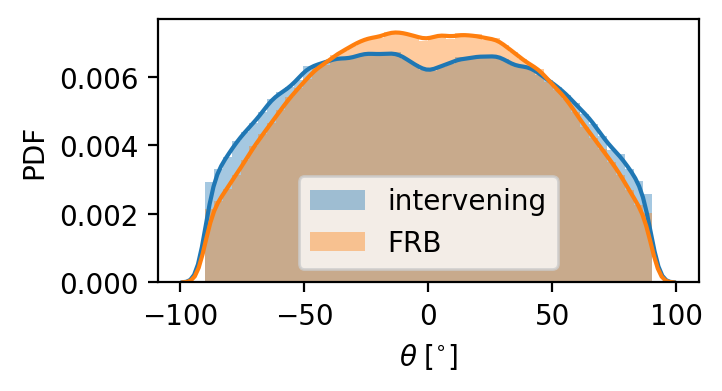

In [15]:
fig, ax1 = plt.subplots(ncols=1, sharey=True, 
                        figsize=(mnras_text_size/2.,mnras_text_size/4.))
plot_distribution(run.get('LoS_theta',0), r'\theta', u.deg, ax=ax1, 
                  label='intervening')
plot_distribution(run.get('FRB_LoS_theta',0), r'\theta', u.deg, ax=ax1,
                  label='FRB')
ax1.set_ylabel('PDF'); ax1.legend();

Loading LoS_y at z=-5.960464477539063e-08
Loading LoS_z at z=-5.960464477539063e-08
Loading FRB_LoS_y at z=-5.960464477539063e-08
Loading FRB_LoS_z at z=-5.960464477539063e-08


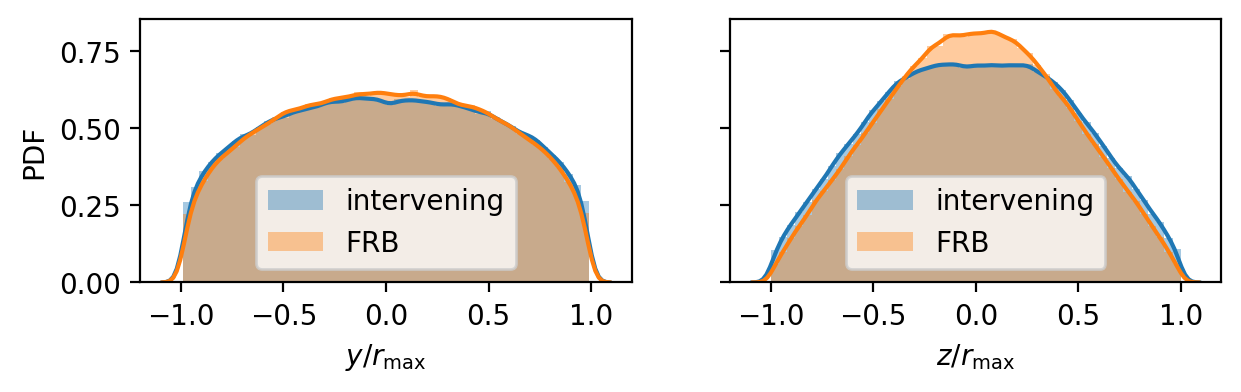

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,
                              figsize=(mnras_text_size,mnras_text_size/4.))

plot_distribution(run.get('LoS_y',0), r'y/r_{\rm max}', ax=ax1, 
                  label='intervening')
plot_distribution(run.get('LoS_z',0), r'z/r_{\rm max}', ax=ax2, 
                  label='intervening')

plot_distribution(run.get('FRB_LoS_y',0), r'y/r_{\rm max}', ax=ax1, 
                  label='FRB')
plot_distribution(run.get('FRB_LoS_z',0), r'z/r_{\rm max}', ax=ax2, 
                  label='FRB')
ax1.set_ylabel('PDF'); ax1.legend(); ax2.legend();

Loading RM at z=-5.960464477539063e-08


/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


Loading FRB_RM at z=-5.960464477539063e-08


/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


Loading SM at z=-5.960464477539063e-08
Loading FRB_SM at z=-5.960464477539063e-08
Loading DM at z=-5.960464477539063e-08
Loading FRB_DM at z=-5.960464477539063e-08


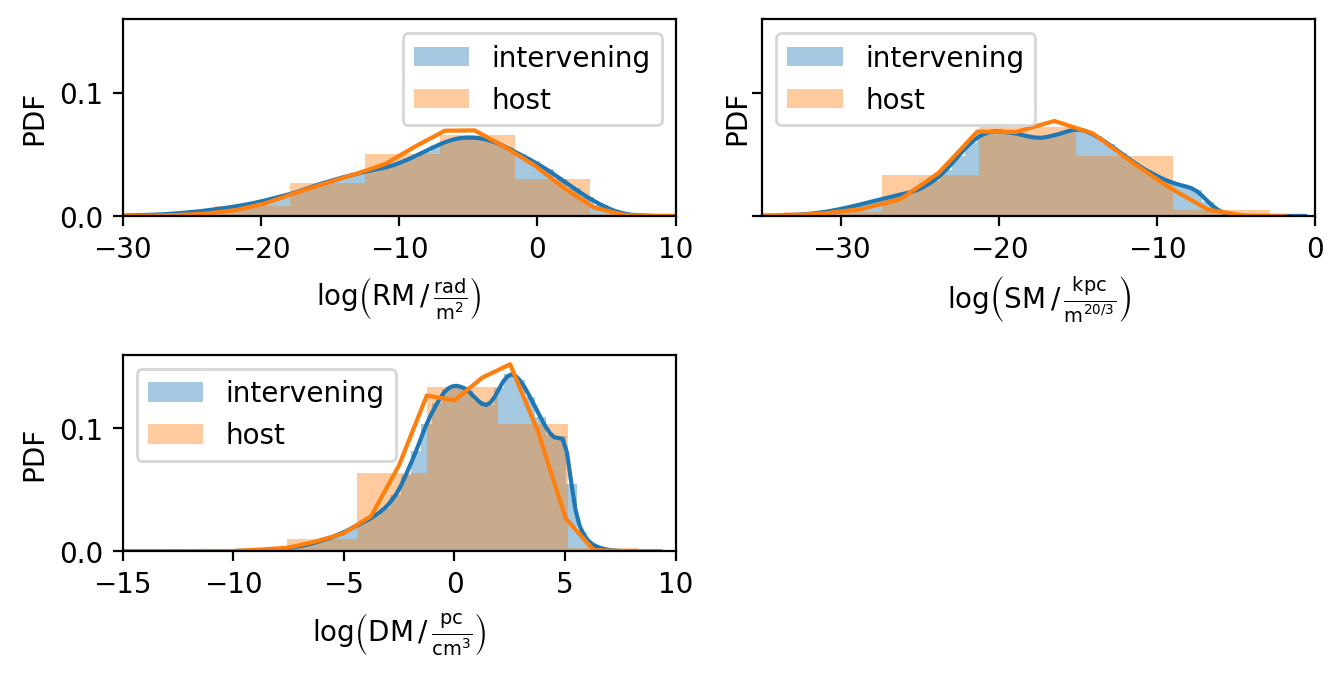

In [17]:
fig, axs = plt.subplots(ncols=2,nrows=2, sharey=True)
lims_dic = {'RM': (-30,10),
            'SM': (-35,0),
            'DM': (-15,10)}
for q, ax in zip(('RM','SM', 'DM'), axs.ravel()):
    plot_distribution(run.get(q,0), r'{\rm '+q+'}', log=True, ax=ax,
                      label='intervening')
    plot_distribution(run.get('FRB_'+q,0), r'{\rm '+q+'}', log=True, ax=ax,
                      label='host')
    ax.set_xlim(lims_dic[q])
    ax.set_ylabel('PDF'); ax.legend()
plt.tight_layout()
axs.ravel()[-1].axis('off');

Loading RM at z=0.9887079000473022


/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


Loading FRB_RM at z=0.9887079000473022


/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


Loading SM at z=0.9887079000473022
Loading FRB_SM at z=0.9887079000473022
Loading DM at z=0.9887079000473022
Loading FRB_DM at z=0.9887079000473022


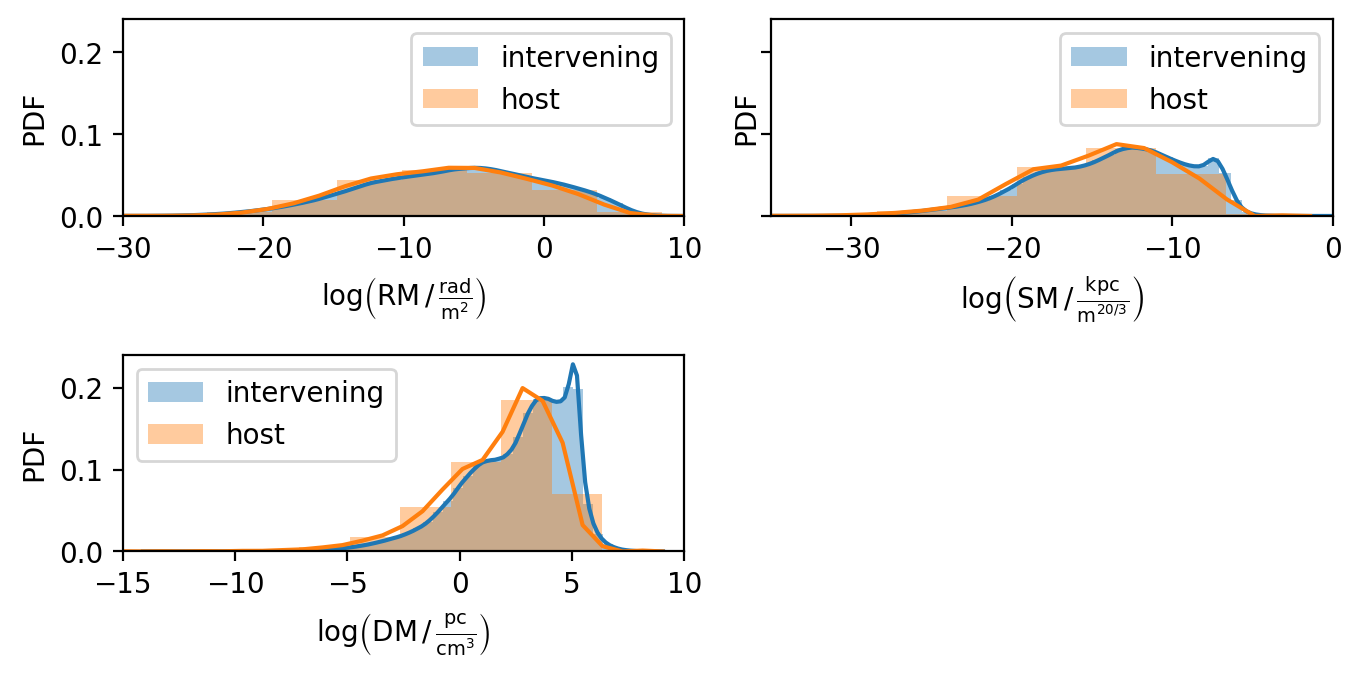

In [19]:
fig, axs = plt.subplots(ncols=2,nrows=2, sharey=True)
lims_dic = {'RM': (-30,10),
            'SM': (-35,0),
            'DM': (-15,10)}
for q, ax in zip(('RM','SM', 'DM'), axs.ravel()):
    plot_distribution(run.get(q, 0.98), r'{\rm '+q+'}', log=True, ax=ax,
                      label='intervening')
    plot_distribution(run.get('FRB_'+q, 0.98), r'{\rm '+q+'}', log=True, ax=ax,
                      label='host')
    ax.set_xlim(lims_dic[q])
    ax.set_ylabel('PDF'); ax.legend()
plt.tight_layout()
axs.ravel()[-1].axis('off');